# Milestone 1

## Perkenalan

- Nama  =   Alsello Diveni Manuputty
- Batch =   HCK - 006 Pondok Indah

**Objective**
Pada notebook ini akan dilakukan Preprocessing Data Raw, Data Visualization, dan EDA untuk menyelesaikan Milestone 1 Phase 0

**Link Kaggle**
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/code?datasetId=2380415&sortBy=voteCount

**Link Dashboard**
https://public.tableau.com/app/profile/alsello.manuputty/viz/Milestone1_16874416883200/Dashboard1?publish=yes

## Identifikasi Masalah

**Problem Statement**

Mengetahui gambaran umum mengenai AirBnB di Kota New York

**Penjabaran Masalah**

- Bagaimana kualitas AirBnB masing-masing area?
- Berapa rata - rata harga masing - masing penilaiannya?
- Bagaimana kebiasaan pelanggan dalam melakukan penilaian?
- Apakah ada hubungan antara harga dengan penilaian penginapannya?
- Apakah harga penginapan berhubungan dengan biaya pelayanannya?
- Bagaimana hubungan antara umur bangunan dengan jumlah orang yang memberi penilaian?
- Adakah pattern tertentu di behaviour tamu dalam memberikan penilaian? (Statistik Deskriptif)
- Bagaimana hubungan harga penginapan dengan tipe penginapannya? (Statistik Deskriptif)
- Apakah perbedaan harga di tipe penginapan tertentu berbeda signifikan? (Statistik Inferensial)





## Data Loading

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats



In [2]:
# import data
mentah = pd.read_csv('Airbnb_Open_Data.csv',parse_dates = ['last review'])

C:\Users\alsel\AppData\Local\Temp\ipykernel_13360\3287379543.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  mentah = pd.read_csv('Airbnb_Open_Data.csv',parse_dates = ['last review'])


## Exploratory Data Analysis

In [3]:
# Overview Dataset
mentah.head()       

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# set display kolom tanpa batas
pd.set_option('display.max_columns', None)

In [5]:
mentah

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [6]:
# bentuk kolom
mentah.shape

(102599, 26)

In [7]:
# list kolom
mentah.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
# info data mentah
mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [9]:
# tipe data 
mentah.dtypes

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                     object
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month   

In [10]:
# jumlah missing value
mentah.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
# cek korelasi data
mentah.corr()

C:\Users\alsel\AppData\Local\Temp\ipykernel_13360\571219759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mentah.corr()


,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
id,1.000000,-0.000830,-0.008832,0.042546,0.001081,0.005668,-0.041530,0.038038,0.036633,0.024296,-0.139226
host id,-0.000830,1.000000,0.000661,-0.008999,0.004871,-0.002266,-0.004503,-0.001746,0.003459,0.001722,-0.002044
lat,-0.008832,0.000661,1.000000,0.074348,0.005697,0.014889,-0.025236,-0.019492,-0.003917,0.032468,-0.005011
long,0.042546,-0.008999,0.074348,1.000000,0.000861,-0.039639,0.069169,0.118598,0.015283,-0.104154,0.058428
Construction year,0.001081,0.004871,0.005697,0.000861,1.000000,-0.000486,0.001990,0.004092,0.004753,-0.002745,-0.008264
minimum nights,0.005668,-0.002266,0.014889,-0.039639,-0.000486,1.000000,-0.049997,-0.096141,-0.002167,0.084846,0.063541
number of reviews,-0.041530,-0.004503,-0.025236,0.069169,0.001990,-0.049997,1.000000,0.590939,-0.018412,-0.080907,0.099368
reviews per month,0.038038,-0.001746,-0.019492,0.118598,0.004092,-0.096141,0.590939,1.000000,0.037526,-0.025621,0.077193
review rate number,0.036633,0.003459,-0.003917,0.015283,0.004753,-0.002167,-0.018412,0.037526,1.000000,0.024273,-0.006217
calculated host listings count,0.024296,0.001722,0.032468,-0.104154,-0.002745,0.084846,-0.080907,-0.025621,0.024273,1.000000,0.159194


In [12]:
# unique value data
mentah.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [13]:
# set nama kolom menjadi seragam
mentah.columns=[col.lower().replace(" ","_") for col in mentah.columns]
mentah.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [14]:
# deskripsi data
mentah.describe()

,id,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


## Data Cleaning

In [15]:
 # drop id dan host_id karena analis nilai terlalu unique dan tidak membantu jika ada kolom name
df = mentah.drop(columns=["id","host_id"],axis=1,inplace=True)


In [16]:
df = mentah

In [17]:
df

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [18]:
 # drop kolom - kolom yang terlihat tidak berguna dari overview
df.drop(columns=["availability_365","host_identity_verified","house_rules","license","country","country_code","last_review","reviews_per_month","calculated_host_listings_count"], axis=1, inplace=True)        

In [19]:
df

,name,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number
0,Clean & quiet apt home by the park,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0
1,Skylit Midtown Castle,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0
3,NaN,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,3.0
102595,Best Location near Columbia U,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2.0
102596,"Comfy, bright room in Brooklyn",Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,5.0
102597,Big Studio-One Stop from Midtown,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0


In [20]:
# melihat value di dalam kolom price
df.price.values

array(['$966 ', '$142 ', '$620 ', ..., '$988 ', '$546 ', '$1,032 '],
      dtype=object)

In [21]:
# function membuang simbol dolar di kolom supaya numerik dan mudah diolah
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [22]:
df["price"]=df["price"].apply(lambda x: remove_dollar_sign(x))


In [23]:
df["service_fee"]=df["service_fee"].apply(lambda x: remove_dollar_sign(x))

In [24]:
# mengganti typo dengan yang benar
df['neighbourhood_group'] = df['neighbourhood_group'].replace('manhatan','Manhattan').replace('brookln','Brooklyn')


In [25]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
df

,name,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number
0,Clean & quiet apt home by the park,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,4.0
1,Skylit Midtown Castle,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,5.0
3,NaN,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,844.0,169.0,1.0,0.0,3.0
102595,Best Location near Columbia U,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,837.0,167.0,1.0,1.0,2.0
102596,"Comfy, bright room in Brooklyn",Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,988.0,198.0,3.0,0.0,5.0
102597,Big Studio-One Stop from Midtown,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,3.0


In [27]:
# angka review lebih baik diubah menjadi integer
df["review_rate_number"] = np.array(df["review_rate_number"], dtype=np.int8)

c:\Users\alsel\anaconda3\envs\hack\lib\site-packages\pandas\core\series.py:893: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype)


In [28]:
# minimum nights lebih baik diubah menjadi integer
df["minimum_nights"] = np.array(df["minimum_nights"], dtype=np.int8)

In [29]:
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].median())

In [30]:
# asumsi minimum nights yang minus adalah 0 malam
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 0 if x < 0 else x)

C:\Users\alsel\AppData\Local\Temp\ipykernel_13360\1862844130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.minimum_nights)


<Axes: xlabel='minimum_nights', ylabel='Density'>

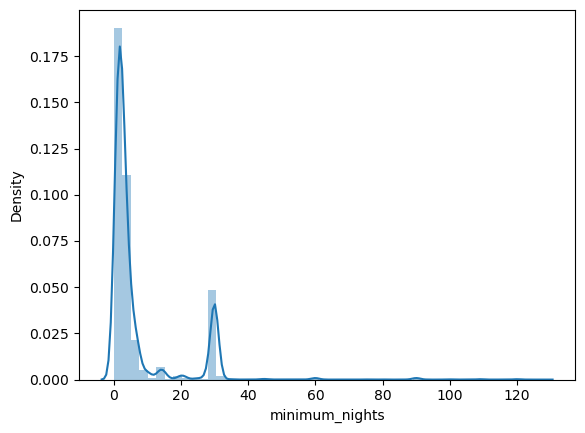

In [31]:
sns.distplot(df.minimum_nights)

In [32]:
df.isnull().sum()

name                   250
host_name              406
neighbourhood_group     29
neighbourhood           16
lat                      8
long                     8
instant_bookable       105
cancellation_policy     76
room_type                0
construction_year      214
price                  247
service_fee            273
minimum_nights           0
number_of_reviews      183
review_rate_number       0
dtype: int64

In [33]:
# calculate the % missing values
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,name,0.243667
1,host_name,0.395715
2,neighbourhood_group,0.028265
3,neighbourhood,0.015595
4,lat,0.007797
5,long,0.007797
6,instant_bookable,0.102340
7,cancellation_policy,0.074075
8,room_type,0.000000
9,construction_year,0.208579


In [34]:
df.isnull().sum()

name                   250
host_name              406
neighbourhood_group     29
neighbourhood           16
lat                      8
long                     8
instant_bookable       105
cancellation_policy     76
room_type                0
construction_year      214
price                  247
service_fee            273
minimum_nights           0
number_of_reviews      183
review_rate_number       0
dtype: int64

In [35]:
# drop isi kolom 'price', 'service_fee', 'lat', 'long', 'construction_year','neighbourhood_group','neighbourhood' yang missing value secara row
df.dropna(subset=['price', 'service_fee', 'lat', 'long', 'construction_year','neighbourhood_group','neighbourhood'], inplace=True)

In [36]:
# fill missing value number of review dengan nol dengan asumsi bahwa missing value adalah belum diisi narasumber survei
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)

In [37]:
# list kolom yang akan di fillna
columns_to_fill = ['name','host_name', 'instant_bookable','cancellation_policy']

In [38]:
# diisi unknown dengan asumsi narasumber survei belum mengisi
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [39]:
# menambah kolom umur bangunan
df['age'] = 2023 - df['construction_year']

In [40]:
# mengubahnya menjadi integer
df["age"] = np.array(df["age"], dtype=np.int8)

In [41]:
# cek missing value sebelum lanjut ke analisis
df.isnull().sum()

name                   0
host_name              0
neighbourhood_group    0
neighbourhood          0
lat                    0
long                   0
instant_bookable       0
cancellation_policy    0
room_type              0
construction_year      0
price                  0
service_fee            0
minimum_nights         0
number_of_reviews      0
review_rate_number     0
age                    0
dtype: int64

## Analisis dan Perhitungan

### Penjabaran Masalah 1 
- Bagaimana kualitas AirBnB masing-masing area?

[Text(0, 0, '3.25026'),
 Text(0, 0, '3.26726'),
 Text(0, 0, '3.32079'),
 Text(0, 0, '3.38672'),
 Text(0, 0, '3.31109')]

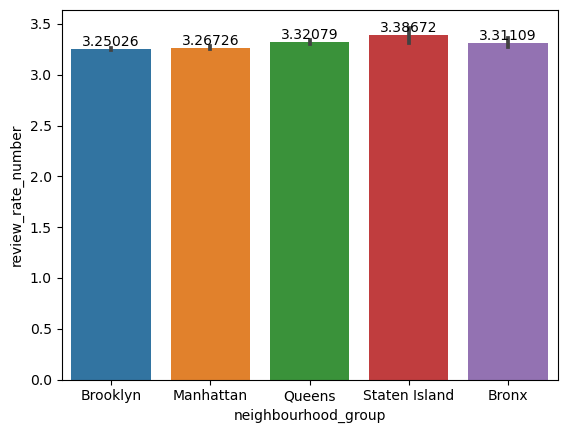

In [42]:
g = sns.barplot(x=df['neighbourhood_group'], y=df['review_rate_number'])

plt.bar_label(g.containers[0])

Rata - rata Penilaian menunjukan angka yang mirip untuk setiap area. Namun, tetap ada satu area yang memiliki rata-rata peling tinggi yaitu Staten Island. Perlu diperhatikan karena nilai rata-rata sangat berhubungan dengan jumlah penginapan. Maka harus dianalisa lebih lanjut.

### Penjabaran Masalah 2
- Bagaimana kebiasaan pelanggan dalam melakukan penilaian?

In [43]:
Rating = df['review_rate_number'].value_counts().sort_index().reset_index()
Rating.columns = ['review_rate_number', 'Count']

In [44]:
Rating

,review_rate_number,Count
0,0,316
1,1,9120
2,2,22936
3,3,23126
4,4,23153
5,5,23213


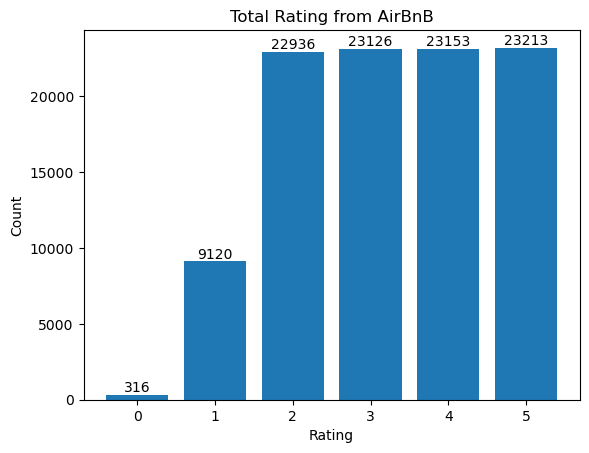

In [45]:
Rate = Rating['review_rate_number']
total_count = Rating['Count']

plt.bar(Rate, total_count)

for i in range(len(Rate)):
    plt.text(Rate[i], total_count[i], str(total_count[i]), ha='center', va='bottom')

plt.xlabel('Rating')
plt.ylabel('Count')

plt.title('Total Rating from AirBnB')

plt.show()

Jumlah orang yang memberikan penilaian cukup merata. Masih belum jelas apa yang bisa disimpulkan dari visualisasi ini.

### Penjabaran Masalah 3
- Berapa rata - rata harga masing - masing kualitasnya?

In [46]:
Rating = df['review_rate_number'].value_counts().sort_index().reset_index()
Rating.columns = ['review_rate_number', 'Count']

In [47]:
PriceRating = df.groupby('review_rate_number')[['price']].mean().sort_values(by='price', ascending=False).reset_index()
PriceRating['price'] = PriceRating['price'].round(decimals=2)  # Round to 2 decimal places
PriceRating


,review_rate_number,price
0,4,626.64
1,2,626.59
2,1,626.26
3,3,626.11
4,5,621.51
5,0,599.02


Dari data lumayan terlihat perbedaan rata-rata harga dari setiap angka penilaian. Mungkin perlu divisualisasi supaya lebih jelas perbedaannya.

### Penjabaran Masalah 4
- Apakah ada hubungan antara harga dengan penilaian penginapannya?

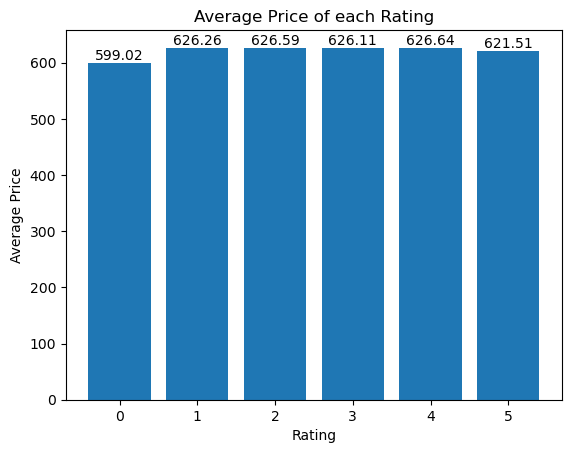

In [48]:
Rate = PriceRating['review_rate_number']
AvgPrice = PriceRating['price']

plt.bar(Rate, AvgPrice)

for i in range(len(Rate)):
    plt.text(Rate[i], AvgPrice[i], str(AvgPrice[i]), ha='center', va='bottom')

plt.xlabel('Rating')
plt.ylabel('Average Price')

plt.title('Average Price of each Rating')

plt.show()

Ternyata rata-rata harga untuk penginapan yang memiliki skor 0 cukup bersaing dengan skor lain. Namun, ada hal yang menarik dimana untuk skor 5 rata-rata harganya lebih rendah daripada yang skor 4. Hal ini analis asumsi bahwa penginapan yang memiliki skor 5 memiliki harga yang sangat bersahabat dengan fasilitas yang sangat memuaskan dibanding dengan skor 4. 

### Penjabaran Masalah 5
- Apakah harga penginapan berhubungan dengan biaya pelayanannya?

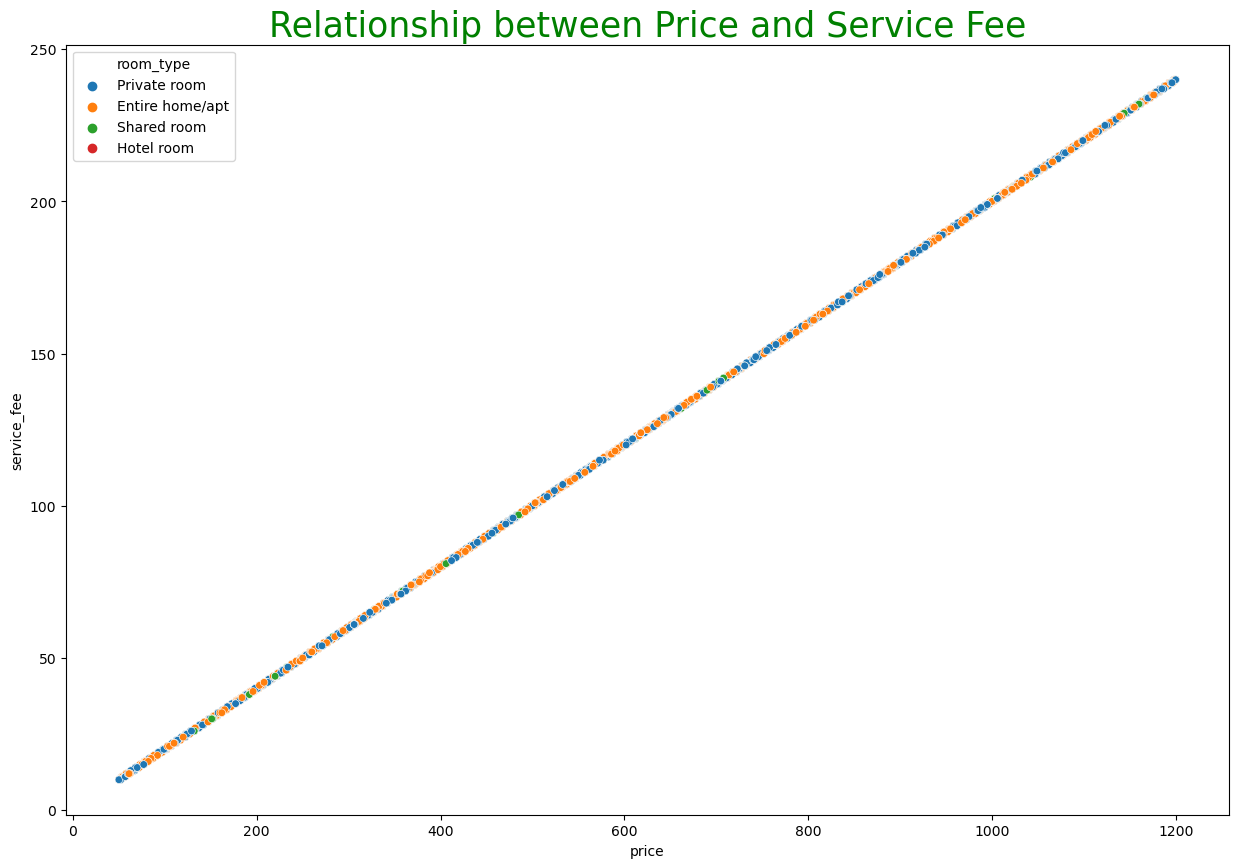

In [49]:
plt.figure(figsize=(15,10))
plt.title("Relationship between Price and Service Fee", size=25, color="green")
sns.scatterplot(x=df.price, y=df.service_fee, hue=df.room_type, s=30);

Sangat jelas terlihat dari visualisasi bahwa biaya pelayanan sangat berhubungan dengan harga penginapannya. Hal ini terbukti dari persebaran datanya dimana semakin tinggi nya harga, maka semakin tinggi pula biaya service nya

### Penjabaran Masalah 6

- Bagaimana hubungan antara umur bangunan dengan jumlah orang yang memberi penilaian?

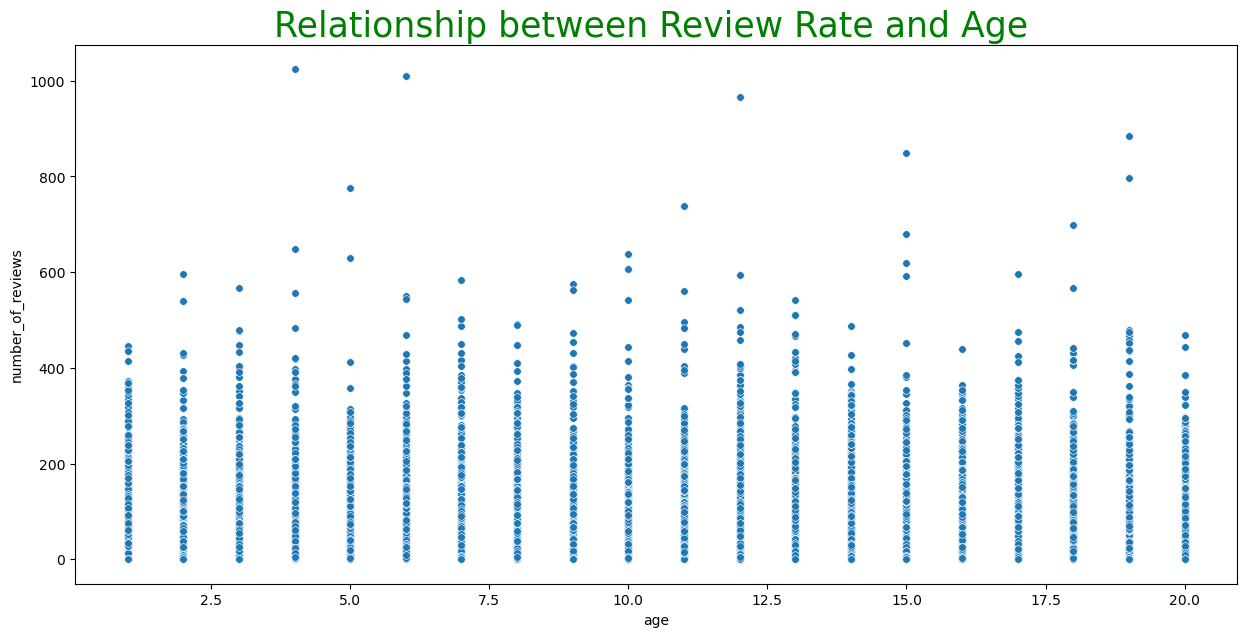

In [50]:
plt.figure(figsize=(15,7))
plt.title("Relationship between Review Rate and Age ", size=25, color="green")
sns.scatterplot(x=df.age, y=df.number_of_reviews, s=30);

Tidak terlihat jelas hubungan antara umur bangunan dengan jumlah orang yang melakukan penilaian. Bisa disimpulkan bahwa tamu-tamu AirBnB kota New York tidak memiliki preferensi tertentu terhadap umur bangunan penginapan.

### Penjabaran Masalah 7

- Adakah pattern tertentu di behaviour tamu dalam memberikan penilaian? (Statistik Deskriptif)

<Axes: xlabel='review_rate_number', ylabel='number_of_reviews'>

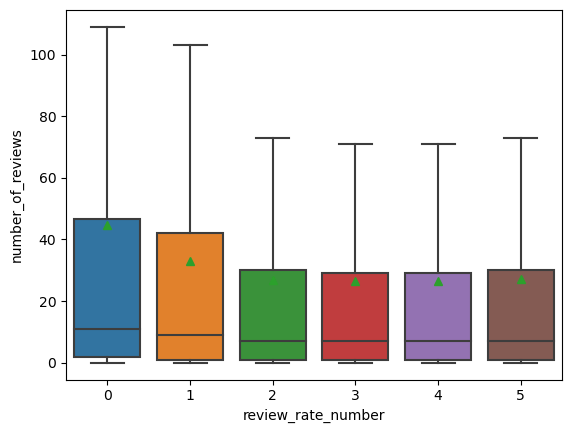

In [51]:
sns.boxplot(data=df,x='review_rate_number',y='number_of_reviews', showfliers = False, showmeans = True)

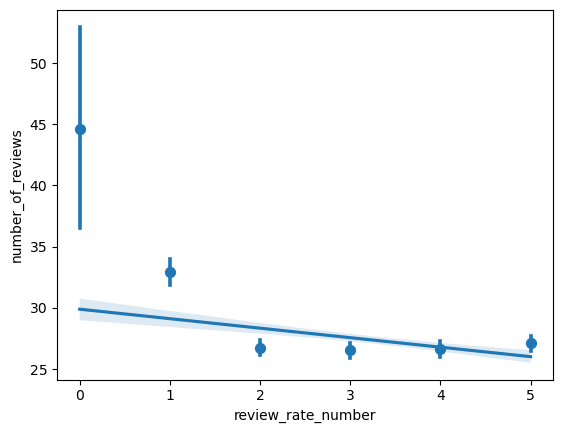

In [52]:
sns.regplot(data=df,x='review_rate_number',y='number_of_reviews',x_bins=[0,1,2,3,4,5])
plt.xticks([0,1,2,3,4,5],[0,1,2,3,4,5]);

Terlihat sangat jelas bahwa ada kenaikan jumlah orang yang melakukan penilaian untuk skor 0. Bisa disimpulkan bahwa setiap tamu mendapat pengalaman buruk dalam bentuk apapun saat menginap, hal itu akan langsung diberikan penilaian. Cukup keras mereka terhadap pelayanan.

### Penjabaran Masalah 8
- Bagaimana hubungan harga penginapan dengan tipe penginapannya? (Statistik Deskriptif)

In [53]:
stay_type = ''
for index, row in df.iterrows():
    if (row['minimum_nights'] >= 1) & (row['minimum_nights'] <= 5):
        stay_type = 'Daily'  
    elif (row['minimum_nights'] >= 6) & (row['minimum_nights'] <= 21):
        stay_type = 'Weekly'
    elif (row['minimum_nights'] >= 22) & (row['minimum_nights'] <= 120):
        stay_type = 'Monthly'
    else:
        stay_type = 'Quarterly'
    df.at[index, 'stay_type'] = stay_type

<Axes: xlabel='stay_type', ylabel='price'>

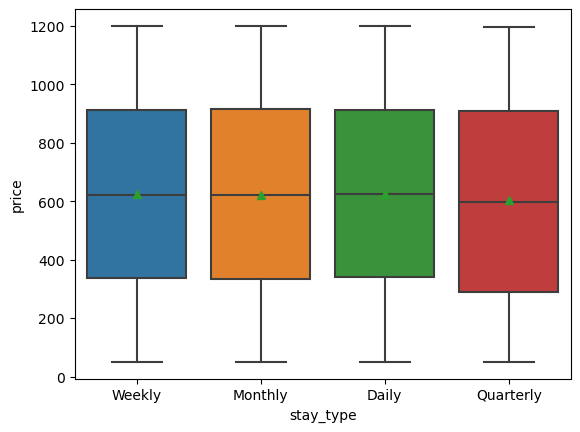

In [54]:
# boxplot
sns.boxplot(y=df['price'], x =  df['stay_type'],showmeans = True)

Harga penginapan untuk setiap tipe penginapan tidak menunjukan perbedaan mencolok. Hanya saja sepertinya lebih ekonomis untuk menginap dalam waktu 3 bulan.

### Penjabaran Masalah 9

- Apakah perbedaan harga di tipe penginapan tertentu berbeda signifikan? (Statistik Inferensial)

In [55]:
daily_type = df[df['stay_type'] == 'Daily']['price']
monthly_type = df[df['stay_type'] == 'Monthly']['price']


print('Average Daily Type Price : {}'.format(np.round(daily_type.mean())))
print('Average Monthly Type Price: {}'.format(np.round(monthly_type.mean())))

Average Daily Type Price : 626.0
Average Monthly Type Price: 623.0


In [56]:
t_stat,p_val = stats.ttest_ind(daily_type,monthly_type)
print('P-Value : ',p_val)
print('t-statistics : ',t_stat)

P-Value :  0.3149834356681579
t-statistics :  1.0048257099232116


- **H0 : μ daily type = μ monthly type**
- **H1 : μ daily type != μ monthly type**

Berhubung H0 disini adalah perbedaan harganya tidak signifikan dan H1 nya adalah perbedaan nya signifikan. Maka, dapat disimpulkan untuk uji statistik deskriptif ini H0 diterima karena P-value > 0.05. Bisa juga dibilang bahwa **perbedaan nya tidak signifikan**.

### Pengambilan Kesimpulan

- Rata - rata Penilaian menunjukan angka yang mirip untuk setiap area. Namun, satu area memiliki rata-rata penilaian paling tinggi yaitu Staten Island.

- Jumlah orang yang memberikan penilaian cukup merata. Namun terlihat untuk rating 0, rata-rata tamu langsung memberi review. Analis dapat bersimpati dalam hal ini karena kritik adalah untuk membangun bukan menjatuhkan.

- Dari data lumayan terlihat perbedaan rata-rata harga dari setiap angka penilaian. Setelah divisualisasi, ternyata rata-rata harga untuk penginapan yang memiliki skor 0 cukup bersaing dengan skor lain. Namun, ada hal yang menarik dimana untuk skor 5 rata-rata harganya lebih rendah daripada yang skor 4. Hal ini analis asumsi bahwa penginapan yang memiliki skor 5 memiliki harga yang sangat bersahabat dengan fasilitas yang sangat memuaskan dibanding dengan skor 4. Analis juga akan melakukan hal yang sama.

- Sangat jelas terlihat dari visualisasi bahwa biaya pelayanan sangat berhubungan dengan harga penginapannya. Hal ini terbukti dari persebaran datanya dimana semakin tinggi nya harga, maka semakin tinggi pula biaya service nya. Masuk akal dan tidak ada masalah disini.

- Tidak terlihat jelas hubungan antara umur bangunan dengan jumlah orang yang melakukan penilaian. Bisa disimpulkan bahwa tamu-tamu AirBnB kota New York tidak memiliki preferensi tertentu terhadap umur bangunan penginapan. Mungkin disebabkan oleh orang Barat tidak percaya tahayul dimana setiap bangunan tua punya 'pengganggu'.

- Harga penginapan untuk setiap tipe penginapan tidak menunjukan perbedaan mencolok. Hanya saja sepertinya lebih ekonomis untuk menginap dalam waktu 3 bulan.

- H0 untuk uji inferensial adalah perbedaan harga di tipe penginapan tidak signifikan dan H1 nya adalah perbedaan harga nya signifikan.  Maka, dapat disimpulkan untuk uji statistik deskriptif ini H0 diterima karena P-value > 0.05. Bisa juga dibilang bahwa **perbedaan nya tidak signifikan**.

### Import Data ke Local

In [57]:
# cek info terakhir sebelum import data ke Tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101864 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 101864 non-null  object 
 1   host_name            101864 non-null  object 
 2   neighbourhood_group  101864 non-null  object 
 3   neighbourhood        101864 non-null  object 
 4   lat                  101864 non-null  float64
 5   long                 101864 non-null  float64
 6   instant_bookable     101864 non-null  object 
 7   cancellation_policy  101864 non-null  object 
 8   room_type            101864 non-null  object 
 9   construction_year    101864 non-null  float64
 10  price                101864 non-null  float64
 11  service_fee          101864 non-null  float64
 12  minimum_nights       101864 non-null  int64  
 13  number_of_reviews    101864 non-null  float64
 14  review_rate_number   101864 non-null  int8   
 15  age              

In [58]:
# cek missing value terakhir sebelum import ke Tableau
df.isnull().sum()

name                   0
host_name              0
neighbourhood_group    0
neighbourhood          0
lat                    0
long                   0
instant_bookable       0
cancellation_policy    0
room_type              0
construction_year      0
price                  0
service_fee            0
minimum_nights         0
number_of_reviews      0
review_rate_number     0
age                    0
stay_type              0
dtype: int64

In [59]:
#df.to_csv('AirBnb_Bersih.csv',index = False)